

## Step 1: Reading the files from individual folders as part of data extraction

In [1]:
import glob
import csv
import pandas as pd
import re

def dataExtraction(path):
    list_of_files = glob.glob(path)
    text_add=[]
  
    for fileName in list_of_files:
        data = open( fileName, encoding='utf8')
        data=data.read()
        text= data.split(' ') # Extracting words from text files
        for i in text:
            if i!='ID' and i!='NAME' and i!='SPEAKER' and i!='CHAPTER' and i!='LANGUAGE' and  i!='<P>':
                text_add.append(i)
    return(text_add) # Returns a list of all words in a given text file

## Step 2: Removing noise from Training data

This includes removing punctuations and digits from the extracted text.

In [2]:
def removeNoise(data):
    data[0]= data[0].str.replace('\s', ' ')
    data[0]= data[0].str.replace('ID', ' ')
    data[0]= data[0].str.replace('NAME', ' ')
    data[0]= data[0].str.replace('SPEAKER', ' ')
    data[0]= data[0].str.replace('CHAPTER', ' ')
    data[0]= data[0].str.replace('LANGUAGE', ' ')
    data[0]= data[0].str.replace('<P>', ' ')
    data[0]= data[0].str.replace('/', ' ')
    data[0]= data[0].str.replace('[=<>":-;.,\(\)]', ' ')
    data[0]= data[0].str.replace('[0-9]', ' ')
    data[0]= data[0].str.strip()
    data = data[data[0] != '']
    data= data.drop_duplicates()
    data=data.dropna()
    return(data)


## Step 3: Removing noise from Test data

We ensure that we treat the test data exactly like we treated the training data to remove characters such as punctuations and digits which add noise to test data

In [3]:
def removeNoiseTest(data):
    data[1]= data[1].str.replace('\s', ' ')
    data[1]= data[1].str.replace('ID', ' ')
    data[1]= data[1].str.replace('NAME', ' ')
    data[1]= data[1].str.replace('SPEAKER', ' ')
    data[1]= data[1].str.replace('CHAPTER', ' ')
    data[1]= data[1].str.replace('LANGUAGE', ' ')
    data[1]= data[1].str.replace('<P>', ' ')
    data[1]= data[1].str.replace('/', ' ')
    data[1]= data[1].str.replace('[=<>":-;.,\(\)]', ' ')
    data[1]= data[1].str.replace('[0-9]', ' ')
    data[1]= data[1].str.strip()
    data = data[data[1] != '']
    data= data.drop_duplicates()
    data=data.dropna()
    return(data)

## Language Detection

List of all the languages whose detection is supported:
- 'bg': Bulgarian
- 'cs': Czech
- 'da': Danish
- 'de': German
- 'el': Greek, Modern 
- 'en': English
- 'es': Spanish
- 'et': Estonian
- 'fi': Finnish
- 'fr': French
- 'hu': Hungarian
- 'it': Italian
- 'lt': Lithuanian
- 'lv': Latvian
- 'nl': Dutch
- 'pl': Polish
- 'pt': Portuguese
- 'ro': Romanian
- 'sk': Slovak
- 'sl': Slovenian
- 'sv': Swedish

There are therefore, 21 categorical variables that our classifier needs to be able to identify correctly.

In [4]:
# List of labels to be classified

labels=['bg','cs','da','de','el','en','es','et','fi','fr','hu','it','lt','lv','nl','pl','pt','ro','sk','sl','sv'] 

## Step 4: Function used to join all words held in a dataframe for a given language and place these words in a list

In [5]:
def listToText(Series): 
    Series_list= Series[0].tolist()
    Series_str= ' '.join(Series_list)
    return(Series_str)

### Implementing Step 1 and Step 2 on raw text files to obtain Training data

In [6]:
path_bg= '~/startup_ml/europarl/txt/bg/*.txt'
a1= dataExtraction(path_bg)

In [7]:
b1= pd.DataFrame(a1)

In [8]:
data_bg= removeNoise(b1)
data_bg.head(1)

,0
1,Състав


In [9]:
path_cs= '~/startup_ml/europarl/txt/cs/*.txt'
a2= dataExtraction(path_cs)

In [10]:
b2= pd.DataFrame(a2)

In [11]:
data_cs= removeNoise(b2)
data_cs.head(1)

,0
1,Schválení


In [12]:
path_da= '~/startup_ml/europarl/txt/da/*.txt'
a3= dataExtraction(path_da)

In [13]:
b3= pd.DataFrame(a3)

In [14]:
data_da= removeNoise(b3)
data_da.head(1)

,0
1,Genoptagelse


In [15]:
path_de= '~/startup_ml/europarl/txt/de/*.txt'
a4= dataExtraction(path_de)

In [16]:
b4= pd.DataFrame(a4)

In [17]:
data_de= removeNoise(b4)
data_de.head(1)

,0
1,Wiederaufnahme


In [18]:
path_el= '~/startup_ml/europarl/txt/el/*.txt'
a5= dataExtraction(path_el)

In [19]:
b5= pd.DataFrame(a5)

In [20]:
data_el= removeNoise(b5)
data_el.head(1)

,0
1,Επαvάληψη


In [21]:
path_en= '~/startup_ml/europarl/txt/en/*.txt'
a6= dataExtraction(path_en)

In [22]:
b6= pd.DataFrame(a6)

In [23]:
data_en= removeNoise(b6)
data_en.head(1)

,0
1,Resumption


In [24]:
path_es= '~/startup_ml/europarl/txt/es/*.txt'
a7= dataExtraction(path_es)

In [25]:
b7= pd.DataFrame(a7)

In [26]:
data_es= removeNoise(b7)
data_es.head(1)

,0
1,Reanudación


In [27]:
path_et= '~/startup_ml/europarl/txt/et/*.txt'
a8= dataExtraction(path_et)

In [28]:
b8= pd.DataFrame(a8)

In [29]:
data_et= removeNoise(b8)
data_et.head(1)

,0
1,Eelmise


In [30]:
path_fi= '~/startup_ml/europarl/txt/fi/*.txt'
a9= dataExtraction(path_fi)

In [31]:
b9= pd.DataFrame(a9)

In [32]:
data_fi= removeNoise(b9)
data_fi.head(1)

,0
1,Istuntokauden


In [33]:
path_fr= '~/startup_ml/europarl/txt/fr/*.txt'
a10= dataExtraction(path_fr)

In [34]:
b10= pd.DataFrame(a10)

In [35]:
data_fr= removeNoise(b10)
data_fr.head(1)

,0
1,Reprise


In [36]:
path_hu= '~/startup_ml/europarl/txt/hu/*.txt'
a11= dataExtraction(path_hu)

In [37]:
b11= pd.DataFrame(a11)

In [38]:
data_hu= removeNoise(b11)
data_hu.head(1)

,0
1,Az


In [39]:
path_it= '~/startup_ml/europarl/txt/it/*.txt'
a12= dataExtraction(path_it)

In [40]:
b12= pd.DataFrame(a12)

In [41]:
data_it= removeNoise(b12)
data_it.head(1)

,0
1,Ripresa


In [42]:
path_lt= '~/startup_ml/europarl/txt/lt/*.txt'
a13= dataExtraction(path_lt)

In [43]:
b13= pd.DataFrame(a13)

In [44]:
data_lt= removeNoise(b13)
data_lt.head(1)

,0
1,Ankstesnio


In [45]:
path_lv= '~/startup_ml/europarl/txt/lv/*.txt'
a14= dataExtraction(path_lv)

In [46]:
b14= pd.DataFrame(a14)

In [47]:
data_lv= removeNoise(b14)
data_lv.head(1)

,0
1,Sēdē


In [48]:
path_nl= '~/startup_ml/europarl/txt/nl/*.txt'
a15= dataExtraction(path_nl)

In [49]:
b15= pd.DataFrame(a15)

In [50]:
data_nl= removeNoise(b15)
data_nl.head(1)

,0
1,Hervatting


In [51]:
path_pl= '~/startup_ml/europarl/txt/pl/*.txt'
a171= dataExtraction(path_pl)

In [52]:
b171= pd.DataFrame(a171)

In [53]:
data_pl= removeNoise(b171)
data_pl.head(1)

,0
1,Zatwierdzenie


In [54]:
path_pt= '~/startup_ml/europarl/txt/pt/*.txt'
a17= dataExtraction(path_pt)

In [55]:
b17= pd.DataFrame(a17)

In [56]:
data_pt= removeNoise(b17)
data_pt.head(1)

,0
1,Reinício


In [57]:
path_ro= '~/startup_ml/europarl/txt/ro/*.txt'
a18= dataExtraction(path_ro)

In [58]:
b18= pd.DataFrame(a18)

In [59]:
data_ro= removeNoise(b18)
data_ro.head(1)

,0
1,Componenţa


In [60]:
path_sk= '~/startup_ml/europarl/txt/sk/*.txt'
a19= dataExtraction(path_sk)

In [61]:
b19= pd.DataFrame(a19)

In [62]:
data_sk= removeNoise(b19)
data_sk.head(1)

,0
1,Schválenie


In [63]:
path_sl= '~/startup_ml/europarl/txt/sl/*.txt'
a20= dataExtraction(path_sl)

In [64]:
b20= pd.DataFrame(a20)

In [65]:
data_sl= removeNoise(b20)
data_sl.head(1)

,0
1,Sprejetje


In [66]:
path_sv= '~/startup_ml/europarl/txt/sv/*.txt'
a21= dataExtraction(path_sv)

In [67]:
b21= pd.DataFrame(a21)

In [68]:
data_sv= removeNoise(b21)
data_sv.head(1)

,0
1,Återupptagande


### Implementing Step 4

In [69]:
data_bg_str= listToText(data_bg)

In [70]:
data_cs_str= listToText(data_cs)

In [71]:
data_da_str= listToText(data_da)

In [72]:
data_de_str= listToText(data_de)

In [73]:
data_el_str= listToText(data_el)

In [74]:
data_en_str= listToText(data_en)

In [75]:
data_es_str= listToText(data_es)

In [76]:
data_et_str= listToText(data_et)

In [77]:
data_fi_str= listToText(data_fi)

In [78]:
data_fr_str= listToText(data_fr)

In [79]:
data_hu_str= listToText(data_hu)

In [80]:
data_it_str= listToText(data_it)

In [81]:
data_lt_str= listToText(data_lt)

In [82]:
data_lv_str= listToText(data_lv)

In [83]:
data_nl_str= listToText(data_nl)

In [84]:
data_pl_str= listToText(data_pl)

In [85]:
data_pt_str= listToText(data_pt)

In [86]:
data_ro_str= listToText(data_ro)

In [87]:
data_sk_str= listToText(data_sk)

In [88]:
data_sl_str= listToText(data_sl)

In [89]:
data_sv_str= listToText(data_sv)

In [90]:
t= [data_bg_str, data_cs_str, data_da_str, data_de_str, data_el_str, data_en_str, data_es_str, data_et_str, data_fi_str, data_fr_str, data_hu_str, data_it_str, data_lt_str, data_lv_str, data_nl_str, data_pl_str, data_pt_str, data_ro_str, data_sk_str, data_sl_str, data_sv_str]

## Step 5: Converting the list 't', of all lists of strings, from every language, into a single dataframe. 

This dataframe "trainingData" is the Training data that we train our model on.


In [91]:
trainingData=pd.DataFrame(t)

In [92]:
trainingData

,0
0,Състав на Парламента вж протоколи Одобряване п...
1,Schválení zápisu z předchozího zasedání viz zá...
2,Genoptagelse af sessionen Formanden Jeg erkl...
3,Wiederaufnahme der Sitzungsperiode Die Präside...
4,Επαvάληψη της συvσδoυ Πρόεδρος Κηρύσσω την ε...
5,Resumption of the session President I declar...
6,Reanudación del período de sesiones La Preside...
7,Eelmise istungi protokolli kinnitamine vaata P...
8,Istuntokauden uudelleenavaaminen Puhemies Juli...
9,Reprise de la session La Présidente Je décla...


## Step 6: Building the model and training it with the training data

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### Note:
Character frequency analysis and Word frequency analysis is undertaken using a logistic regressing model. n-gram models tested for include:
- 1-gram Character frequency analysis
- 2-gram Character frequency analysis
- 4-gram Character frequency analysis
- 1-gram Word frequency analysis
- 2-gram Word frequency analysis

We use a pipeline to implement these models and we use all CPU cores to build the models. L2 regularization is used to prevent overfitting of the models to training data. The inverse of regularization strength "C" is set to 1.0 for all models. Thereby, the models generalize to new unseen data.




In [95]:

text_clf_1gram = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), analyzer='char')), ('tfidf', TfidfTransformer(use_idf=False)), ('lrg', LogisticRegression(n_jobs=-1))])


In [96]:
basicmodel_1gram = text_clf_1gram.fit(trainingData[0], labels)

In [110]:

text_clf_1gramWord = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), analyzer='word')), ('tfidf', TfidfTransformer(use_idf=False)), ('lrg', LogisticRegression(n_jobs=-1))])


In [111]:
basicmodel_1gramWord = text_clf_1gramWord.fit(trainingData[0], labels)

In [97]:

text_clf_2gram = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), analyzer='char')), ('tfidf', TfidfTransformer(use_idf=False)), ('lrg', LogisticRegression(n_jobs=-1))])


In [98]:
basicmodel_2gram = text_clf_2gram.fit(trainingData[0], labels)

In [99]:

text_clf_4gram = Pipeline([('vect', CountVectorizer(ngram_range=(1,4), analyzer='char')), ('tfidf', TfidfTransformer(use_idf=False)), ('lrg', LogisticRegression(n_jobs=-1))])


In [100]:
basicmodel_4gram = text_clf_4gram.fit(trainingData[0], labels)

In [114]:

text_clf_2gramWord = Pipeline([('vect', CountVectorizer(ngram_range=(1,2), analyzer='word')), ('tfidf', TfidfTransformer(use_idf=False)), ('lrg', LogisticRegression(n_jobs=-1))])


In [115]:
basicmodel_2gramWord = text_clf_2gramWord.fit(trainingData[0], labels)

### Implementing Step 3, preprocessing the Test data 

In [101]:
datatest = pd.read_csv('~/startup_ml/europarl-test/europarl.csv', sep='\t',header=None)

In [102]:
datatest[1]= datatest[1].str.replace('\(.*?\)','')
testData= removeNoiseTest(datatest)

In [103]:
testData.head(5)

,0,1
0,bg,Европа не трябва да стартира нов конкурен...
1,bg,Най-голямата несправедливост на сегашната обща...
2,bg,Г-жо председател г-н член на Комисията по пр...
3,bg,Г-н председател бих искал да започна с комент...
4,bg,Г-н председател въпросът за правата на човека...


## Step 7: Using the trained model to make predictions on the Test data

In [104]:
prediction_1gram= basicmodel_1gram.predict(testData[1])

## Analysis of 1-gram Character Model

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

print (classification_report(testData[0], prediction_1gram))
print (accuracy_score(testData[0], prediction_1gram))

             precision    recall  f1-score   support

         bg       1.00      1.00      1.00       997
         cs       0.49      0.96      0.65       993
         da       0.85      0.79      0.82       994
         de       0.78      0.89      0.83       993
         el       1.00      1.00      1.00       988
         en       0.81      0.72      0.76       998
         es       0.75      0.51      0.61       996
         et       0.90      0.71      0.80       993
         fi       0.84      0.96      0.90       995
         fr       0.91      0.72      0.81       999
         hu       0.91      0.97      0.94       998
         it       0.90      0.48      0.63       996
         lt       0.78      0.94      0.85       995
         lv       0.95      0.94      0.95       978
         nl       0.64      0.90      0.75       999
         pl       0.95      0.97      0.96       997
         pt       0.69      0.85      0.76       996
         ro       0.73      0.88      0.80   

### Prediction accuracy of 80.896% was achieved on test data using a model trained with 1-gram Character logistic regression Model

In [112]:
prediction_1gramWord= basicmodel_1gramWord.predict(testData[1])

## Analysis of 1-gram Word Model

In [113]:
print (classification_report(testData[0], prediction_1gramWord))
print (accuracy_score(testData[0], prediction_1gramWord))

             precision    recall  f1-score   support

         bg       1.00      1.00      1.00       997
         cs       0.85      0.50      0.63       993
         da       0.96      0.89      0.92       994
         de       0.94      0.97      0.95       993
         el       0.63      1.00      0.78       988
         en       0.92      0.96      0.94       998
         es       0.83      0.72      0.77       996
         et       0.93      0.88      0.90       993
         fi       0.91      0.82      0.86       995
         fr       0.72      0.79      0.75       999
         hu       0.98      0.94      0.96       998
         it       0.86      0.92      0.89       996
         lt       0.97      0.84      0.90       995
         lv       0.79      0.91      0.85       978
         nl       0.52      0.94      0.67       999
         pl       0.95      0.81      0.87       997
         pt       0.47      0.56      0.51       996
         ro       0.99      0.84      0.91   

### Prediction accuracy of 82.5439% was achieved on test data using a model trained with 1-gram Word logistic regression Model

In [106]:
prediction_2gram= basicmodel_2gram.predict(testData[1])

## Analysis of 2-gram Character Model

In [107]:
print (classification_report(testData[0], prediction_2gram))
print (accuracy_score(testData[0], prediction_2gram))

             precision    recall  f1-score   support

         bg       1.00      1.00      1.00       997
         cs       0.62      0.98      0.76       993
         da       0.90      0.90      0.90       994
         de       0.89      0.96      0.92       993
         el       1.00      1.00      1.00       988
         en       0.96      0.89      0.92       998
         es       0.93      0.72      0.81       996
         et       0.95      0.83      0.88       993
         fi       0.88      0.99      0.93       995
         fr       0.94      0.93      0.93       999
         hu       0.95      0.99      0.97       998
         it       0.96      0.79      0.87       996
         lt       0.91      0.96      0.94       995
         lv       0.98      0.98      0.98       978
         nl       0.83      0.94      0.88       999
         pl       0.98      0.99      0.98       997
         pt       0.79      0.94      0.86       996
         ro       0.88      0.96      0.92   

### Prediction accuracy of 90.344% was achieved on test data using a model trained with 2-gram Character logistic regression Model

In [108]:
prediction_4gram= basicmodel_4gram.predict(testData[1])

## Analysis of 4-gram Character Model

In [109]:
print (classification_report(testData[0], prediction_4gram))
print (accuracy_score(testData[0], prediction_4gram))

             precision    recall  f1-score   support

         bg       1.00      1.00      1.00       997
         cs       0.68      0.98      0.80       993
         da       0.93      0.93      0.93       994
         de       0.91      0.98      0.94       993
         el       1.00      1.00      1.00       988
         en       0.99      0.92      0.95       998
         es       0.98      0.83      0.90       996
         et       0.97      0.87      0.92       993
         fi       0.90      0.99      0.95       995
         fr       0.97      0.95      0.96       999
         hu       0.95      0.99      0.97       998
         it       0.98      0.88      0.93       996
         lt       0.93      0.97      0.95       995
         lv       0.99      0.99      0.99       978
         nl       0.90      0.95      0.92       999
         pl       0.98      0.99      0.98       997
         pt       0.85      0.97      0.91       996
         ro       0.92      0.98      0.95   

### Prediction accuracy of 93.1775% was achieved on test data using a model trained with 4-gram Character logistic regression Model

In [116]:
prediction_2gramWord= basicmodel_2gramWord.predict(testData[1])

## Analysis of 2-gram Word Model

In [117]:
print (classification_report(testData[0], prediction_2gramWord))
print (accuracy_score(testData[0], prediction_2gramWord))

             precision    recall  f1-score   support

         bg       1.00      1.00      1.00       997
         cs       0.85      0.49      0.62       993
         da       0.96      0.89      0.92       994
         de       0.94      0.97      0.95       993
         el       0.62      1.00      0.77       988
         en       0.91      0.96      0.94       998
         es       0.83      0.72      0.77       996
         et       0.93      0.88      0.90       993
         fi       0.91      0.82      0.86       995
         fr       0.71      0.79      0.75       999
         hu       0.99      0.94      0.96       998
         it       0.86      0.92      0.89       996
         lt       0.97      0.83      0.89       995
         lv       0.79      0.90      0.84       978
         nl       0.52      0.94      0.67       999
         pl       0.95      0.81      0.87       997
         pt       0.47      0.57      0.51       996
         ro       0.99      0.84      0.91   

### Prediction accuracy of 82.3849% was achieved on test data using a model trained with 2-gram Word logistic regression Model

In [13]:
accuracyC=[80.8961695977, 90.3444953023, 93.1775475789]
accuracyW=[82.5439653096, 82.3849674777, 0]
accuracyCA=[1, 2, 4]
accuracyWA=[1.2, 2.2, 4]

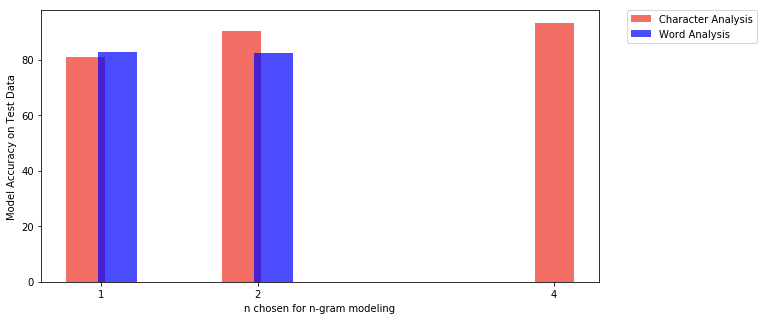

In [28]:
import matplotlib.pyplot as plt
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(accuracyCA, accuracyC,
        # of width
        width,
        # with alpha 0.5
        alpha=0.7,
        # with color
        color='#EE3224')

plt.bar(accuracyWA, accuracyW,
        # of width
        width,
        # with alpha 0.5
        alpha=0.7,
        # with color
        color='b')

ax.set_xticks([1.1, 2.1, 4])
ax.set_xticklabels(('1', '2', '4'))
plt.legend(['Character Analysis', 'Word Analysis'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("n chosen for n-gram modeling")
plt.ylabel("Model Accuracy on Test Data")

plt.show()        

## Analysis of result for 4-gram Character Model

The crosstab below shows us the false positives and false negatives that gives us some insight into correlation between languages. "P" stands for Predicted values and "A" stands for Actual values in the crosstab. 
- 399 strings in Slovak where missclassified as Czech. This points at the two languages being highly correlated. This makes sense since Czech Republic and Slovakia have a shared history contributing to similartes between the two languages spoken in this region. 

Similarly the following prominent trends emerged:
- 114 Spanish strings were missclassified as Portuguese
- 68 Estonian strings were missclassified as Finnish
- 44 Swedish strings were missclassified as Danish
- 42 Italian strings were missclassified as Romanian
- 30 Italian strings were missclassified as Portuguese
- 28 Dutch strings were missclassified as German
- 22 Danish strings were missclassified as Dutch
- 22 Estonian strings were missclassified as Lithuanian


In [133]:
CT=pd.crosstab(testData[0], prediction_4gram, rownames=["A"], colnames=["P"], margins=True)
CT= pd.DataFrame(CT)
CT.to_csv('~/startup_ml/Book1.csv')

In [130]:
CT

P,bg,cs,da,de,el,en,es,et,fi,fr,...,lt,lv,nl,pl,pt,ro,sk,sl,sv,All
A,,,,,,,,,,,,,,,,,,,,,
bg,997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,997
cs,0,971,0,0,0,0,0,2,1,0,...,3,0,1,3,2,1,0,2,1,993
da,0,0,926,7,1,3,0,0,1,1,...,1,1,22,0,1,2,0,0,18,994
de,0,0,8,971,0,1,0,1,1,0,...,3,1,5,0,0,0,0,0,0,993
el,0,0,0,0,988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,988
en,0,9,2,14,0,923,0,6,3,6,...,2,1,14,4,6,1,0,0,1,998
es,0,4,0,12,1,0,823,0,1,11,...,3,0,9,0,114,10,0,1,0,996
et,0,4,2,7,0,0,1,866,68,0,...,22,0,13,0,0,0,0,6,2,993
fi,0,1,0,2,0,0,0,2,988,0,...,0,0,2,0,0,0,0,0,0,995


# Inference 

The European Parliment corpus is sizable at about 5 GB. This would seem to be a data at scale problem requiring Big Data analysis. However, by means of sampling we can execute the language detection classifier on a regular PC using the SciPy stack. Around 26.5 MB of text files were randomly selected for each language and analysis was carried out for this subsample (~554 MB) of the 5 GB corpus. We are able to still get a model accuracy of 93.1775%, with the model generalizing to new unseen data. 